In [343]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Part I: Setup

All of the hyperparameters we use:
* `N` is the number of nodes in the graph (including the source and destination nodes)
* `edge_prob` is the probability of an edge occurring between nodes when generating the graph
* `percent_mal` is the percentage of malicious nodes
* `attack_probs` are the bounds for the uniform distribution from which we will draw the attack probability of each malicious node

In [344]:
N = 20      
edge_prob = 0.1 
percent_mal = 0.3
attack_probs = [0.2, 0.8] 

Some helper methods to use when creating the graph:
* `draw_graph` visualizes the graph
* `random_edge` is used to make sure the graph is connected, since the graph is generated randomly and sometimes will not be one single component 

In [345]:
def draw_graph(graph):
    nx.draw(graph, with_labels=True)
    plt.show()

In [346]:
def random_edge(graph):
    edges = list(graph.edges)
    nonedges = list(nx.non_edges(graph))

    chosen_edge = random.choice(edges)
    chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0] or chosen_edge[0] == x[1]])
    
    graph.add_edge(chosen_nonedge[0], chosen_nonedge[1])
    
    return graph

Here we create a random graph and add random edges until it is connected, then draw it

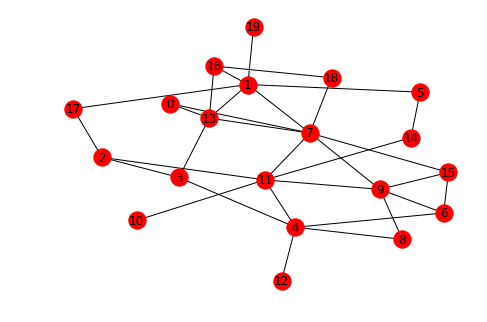

In [347]:
src = 0
dst = N - 1

G = nx.gnp_random_graph(N, edge_prob)

while not nx.is_connected(G):
    G = random_edge(G)

draw_graph(G)

We use the agent class to store information about each node. The agent class is created somewhat lazily, without any actual class definition. We will later define the attributes for each agent.

In [348]:
class agent:
    pass

We randomly assign some percentage (according to `percent_mal`) of the nodes to be malicious.

In [349]:
mal_nodes = []

num_mal = int(N * percent_mal)

while (num_mal > 0):
    rand = np.random.randint(0, N)
    
    if rand not in mal_nodes:
        mal_nodes.append(rand)
        num_mal -= 1

For each node, we create an `agent` class for it. We then classify it as either malicious or not. If it is classified as malicious, we assign it an attack probability drawn from a uniform distribution with bounds specified above.

In [350]:
nodes = list(range(0, N)) # maybe organize this as a dictionary instead
agents = []

for node in nodes:
    a = agent()
    a.node = node # number from 0 to N-1
    
    if node in mal_nodes:
        a.mal = True
        a.attack_prob = np.random.uniform(attack_probs[0], attack_probs[1])
    else:
        a.mal = False
        a.attack_prob = 0
        
    agents.append(a)
    
# Reinforcement Learning Algorithm:
# Pick a path from the source to the destination (all_simple_paths)
# Assign a reward based on how many hops it takes, and if it's corrupted or not (there is a malicious node that is 'attacking' in the path)

# 0 --> 3* --> 11 --> 19 and 3 attacks during this transmission, we should note that it was a corrupted path

# Over time, our algorithm will go from picking paths at random to picking the paths that are short and unlikely to be corrupted


(Possible next step): Write a function to take in a path (from `nx.all_simple_paths(G, src, dst)`) and determine if that path is corrupted. Will have to use the attack probability, so have to find a way to translate that to 0 or 1 - basically flipping a biased coin

In [351]:
def if_corrupted(path, agents): # or make agents a gloabl?
    for node in path: 
        attack_prob = agents[node].attack_prob
        attacked = random.uniform(0,1) < attack_prob
        if attacked:
            return True;
    return False

this line "paths = list(nx.all_simple_paths(G, src, dst))" might take more than a few seconds because the number of paths could be large

In [354]:
paths = list(nx.all_simple_paths(G, src, dst))
paths_corruption = []
print("Number of paths: ", len(paths))
for path in paths:
    paths_corruption.append(if_corrupted(path, agents))
print(paths_corruption)

Number of paths:  295
[True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, False, True, True, True, Tru